In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [59]:
csv_file = 'gsgdp_at_current_price.csv'
df = pd.read_csv(csv_file, delimiter=',', header=0)
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df.head()

state  start_year  end_year      value
0    AP        1993      1994  5786664.0
1    AP        1994      1995  6892337.0
2    AP        1995      1996  7985358.0
3    AP        1996      1997  9014743.0
4    AP        1997      1998  9578227.0

Text(0.5, 1.0, 'GSDP at current price')

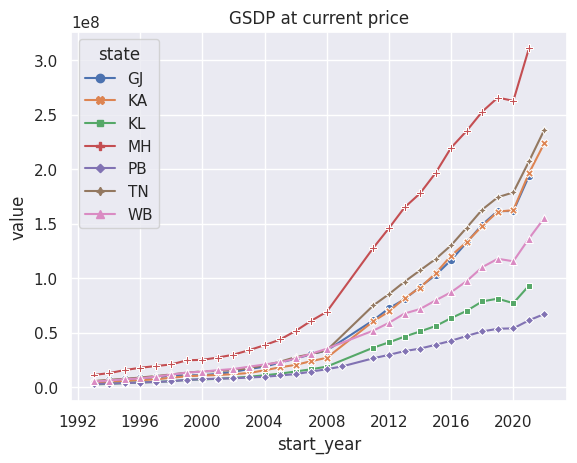

In [60]:
ap_df = df[(df['state'] != 'AP')]
x = ap_df.drop(columns=['end_year'])
x['value'] = pd.to_numeric(x['value'], errors='coerce')
x['start_year'] = pd.to_datetime(x['start_year'], format='%Y')
sns.lineplot(data=x, y='value', x='start_year', hue="state", style="state", markers=True, dashes=False, ).set_title('GSDP at current price')

<Axes: xlabel='start_year', ylabel='value'>

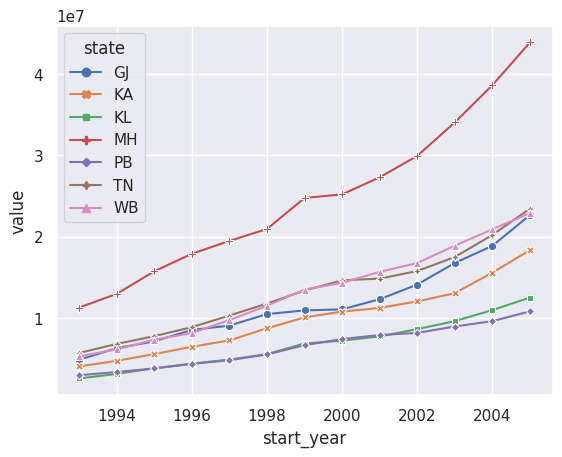

In [61]:
sns.lineplot(df[(df['start_year'] < 2006) & (df['state']!='AP') ], x='start_year', y='value', style='state', hue='state', markers=True, dashes=False)

<Axes: xlabel='start_year', ylabel='value'>

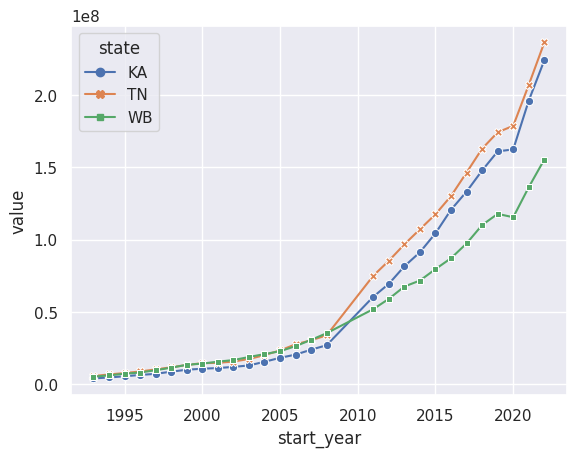

In [62]:
sns.lineplot(data=df[df['state'].isin(['KA', 'WB', 'TN'])], x='start_year', y='value', style='state', hue='state', markers=True, dashes=False)

state  start_year  end_year        value
0      AP        1993      1994    5786664.0
1      AP        1994      1995    6892337.0
2      AP        1995      1996    7985358.0
3      AP        1996      1997    9014743.0
4      AP        1997      1998    9578227.0
..    ...         ...       ...          ...
221    WB        2018      2019  110205400.0
222    WB        2019      2020  117909700.0
223    WB        2020      2021  115582100.0
224    WB        2021      2022  136392600.0
225    WB        2022      2023  155499200.0

[226 rows x 4 columns]

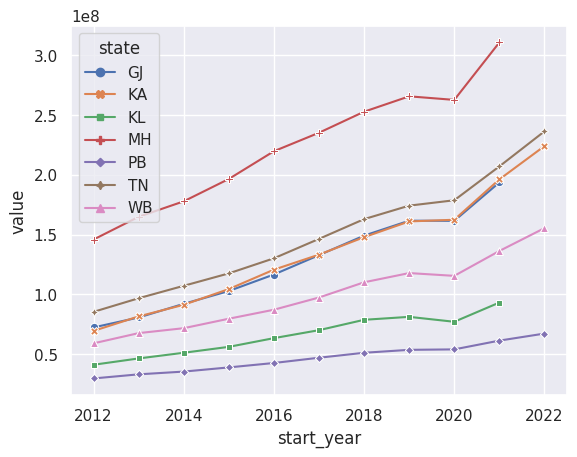

In [63]:
# Calculate growth rate compared to previous year
sns.lineplot(df[(df['state']!='AP') & (df['start_year'] > 2011)], x='start_year', y='value', style='state', hue='state', markers=True, dashes=False)

df